<a href="https://colab.research.google.com/github/Tony-Jaime02/Banana_Convolution-Neural-Network/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset"
!ls

/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset
augmented  Fruits


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os #Importar rutas
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = "/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset"

base_dir = 'Fruits'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 15,
							zoom_range = 0.3,
							horizontal_flip = True,
							brightness_range=[0.7,0.9],
							vertical_flip=True,
							)

Found 262 images belonging to 3 classes.
(6, 150, 150, 3)
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


<Figure size 640x480 with 0 Axes>

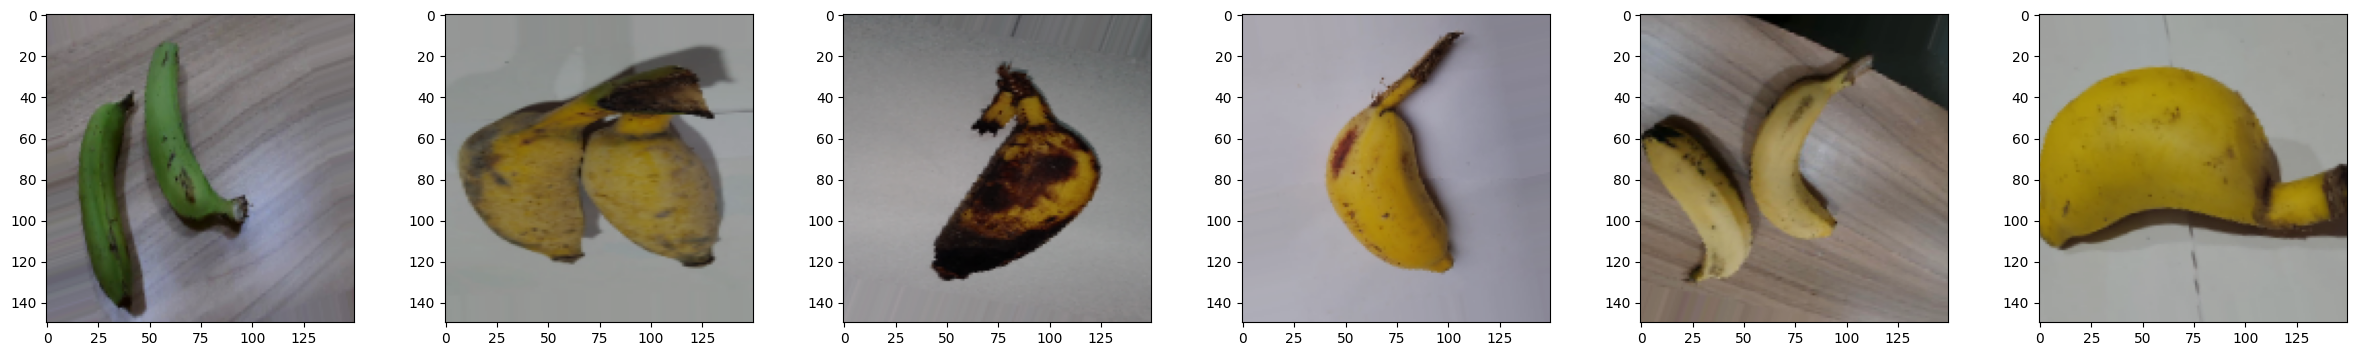

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (250, 250),
							batch_size = 6,
							class_mode ='categorical',
							save_to_dir= path + '/augmented',   
              				save_prefix='aug',
             				save_format='png'
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

#CNN

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 flatten (Flatten)           (None, 219040)            0         
                                                                 
 dense (Dense)               (None, 1)                 219041    
                                                                 
Total params: 219,321
Trainable params: 219,321
Non-trainable params: 0
_________________________________________________________________


#Trainning

Epoch 1/48
44/44 [==============================] - 57s 1s/step - loss: 0.6582 - acc: 0.6616
Epoch 2/48
44/44 [==============================] - 17s 388ms/step - loss: 0.6511 - acc: 0.6603
Epoch 3/48
44/44 [==============================] - 17s 378ms/step - loss: 0.6537 - acc: 0.6578
Epoch 4/48
44/44 [==============================] - 16s 366ms/step - loss: 0.6500 - acc: 0.6654
Epoch 5/48
44/44 [==============================] - 17s 387ms/step - loss: 0.6516 - acc: 0.6641
Epoch 6/48
44/44 [==============================] - 16s 368ms/step - loss: 0.6523 - acc: 0.6552
Epoch 7/48
44/44 [==============================] - 17s 396ms/step - loss: 0.6479 - acc: 0.6654
Epoch 8/48
44/44 [==============================] - 16s 377ms/step - loss: 0.6533 - acc: 0.6616
Epoch 9/48
44/44 [==============================] - 17s 392ms/step - loss: 0.6506 - acc: 0.6578
Epoch 10/48
44/44 [==============================] - 16s 371ms/step - loss: 0.6504 - acc: 0.6654
Epoch 11/48
44/44 [=======================

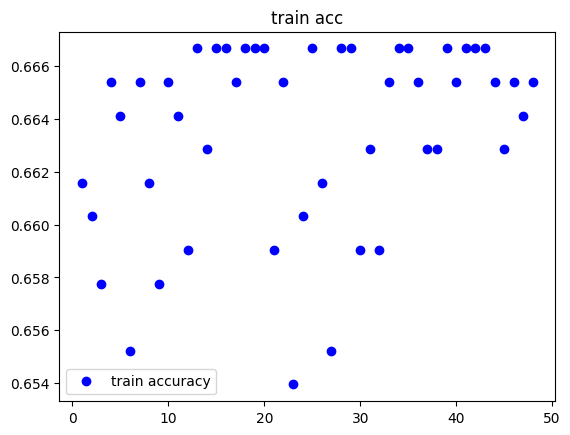

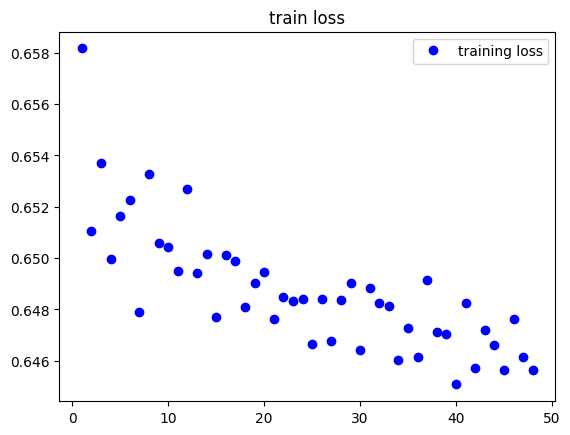

In [ ]:
history = model.fit(
	  	train_generator, 
		epochs = 48)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Found 10 images belonging to 2 classes.
 1/25 [>.............................] - ETA: 5s - loss: 89.1613 - acc: 0.6000

25/25 [==============================] - 0s 1ms/step - loss: 89.1613 - acc: 0.6000

test acc :
 0.6000000238418579
